## In-class exercise 2
The dataset example_tweets.json is the json response returned from the Twitter API. This is a data collected using the keyword search surveillance - tweets that include this keyword are included in the dataset. On [this website](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet) you can find the documentation of the API and the columns it returns. In this challenge, you will explore this data and identify possible privacy and ethical issues with it.

#### Question 1
Use pandas to load this data into a dataframe.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json("example_tweets.json")
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status,possibly_sensitive,extended_entities,withheld_in_countries
0,2021-09-12 15:08:10,1437070537428066307,1437070537428066304,RT @AP: BREAKING: Iran says it will allow UN t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,100,0,False,False,en,None,NaN,None,None
1,2021-09-11 21:32:49,1436804949502013442,1436804949502013440,RT @emeriticus: Bush launched murderous wars f...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,298,0,False,False,en,None,NaN,None,None
2,2021-09-13 15:52:10,1437444000403759106,1437444000403759104,RT @scroll_in: #PegasusRow \n\nCentre refuses ...,False,"[0, 139]","{'hashtags': [{'text': 'PegasusRow', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,1,0,False,False,en,None,NaN,None,None
3,2021-09-12 16:18:28,1437088228251635714,1437088228251635712,@mararara44 @JudahWorldChamp @kprather88 @CDCg...,False,"[104, 384]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.437050e+18,...,NaN,0,0,False,False,en,None,NaN,None,None
4,2021-09-11 13:28:13,1436682997420417030,1436682997420417024,@CoinMarketCap financial surveillance,False,"[15, 37]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.436682e+18,...,NaN,0,2,False,False,fr,None,NaN,None,None


#### Question 2
Explore this dataset using the skills you have learned in the class. Make sure to check how the dataset looks like, what columns it has, what data type these columns have and if there are any missing values. Write a short description of the dataset and the remaining questions of this exercise.

In [4]:
data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'quoted_status',
       'possibly_sensitive', 'extended_entities', 'withheld_in_countries'],
      dtype='object')

In [5]:
data.dtypes

created_at                   datetime64[ns]
id                                    int64
id_str                                int64
full_text                            object
truncated                              bool
display_text_range                   object
entities                             object
metadata                             object
source                               object
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
in_reply_to_screen_name              object
user                                 object
geo                                 float64
coordinates                         float64
place                                object
contributors                        float64
retweeted_status                     object
is_quote_status                        bool
quoted_status_id                    float64
quoted_status_id_str            

In [6]:
data.isna().sum()

created_at                      0
id                              0
id_str                          0
full_text                       0
truncated                       0
display_text_range              0
entities                        0
metadata                        0
source                          0
in_reply_to_status_id         885
in_reply_to_status_id_str     885
in_reply_to_user_id           882
in_reply_to_user_id_str       882
in_reply_to_screen_name       882
user                            0
geo                          1000
coordinates                  1000
place                         994
contributors                 1000
retweeted_status              289
is_quote_status                 0
quoted_status_id              920
quoted_status_id_str          920
retweet_count                   0
favorite_count                  0
favorited                       0
retweeted                       0
lang                            0
quoted_status                 983
possibly_sensi

#### Question 3
How many languages are the tweets in?

In [7]:
data["lang"].value_counts()

lang
en     832
fr     109
ca      25
nl      11
und      7
es       3
it       3
tl       2
in       2
de       2
ja       2
hi       1
th       1
Name: count, dtype: int64

In [9]:
# but if we use the describe function, we don't need to count the number of languages ourselves
# the count is the total number of scores on the lang variables (makes sense, .shape shows us that there are 1000 cases)
# the unique is the unique values on the lang variable: that is the number of languages that the tweets are written in

data["lang"].describe()

count     1000
unique      13
top         en
freq       832
Name: lang, dtype: object

In [10]:
data.shape

(1000, 32)

#### Question 4
How many retweets did the tweets receive on average?

In [13]:
mean_retweets = data["retweet_count"].mean()
print(mean_retweets)

417.352


#### Question 5
Is the retweets number higher or lower for tweets that contain sensitive links vs. the one's with non-sensitive and no links? Tip: check in the documentation what missing values in column possibly_sensitive mean and consider what you need to do with them.

In [14]:
data["possibly_sensitive"].fillna(0, inplace=True)

In [17]:
# sanity check: there should no be no more missing values for the possibly_sensitive variable (because we replaced them all by 0)

data.isna().sum()

created_at                      0
id                              0
id_str                          0
full_text                       0
truncated                       0
display_text_range              0
entities                        0
metadata                        0
source                          0
in_reply_to_status_id         885
in_reply_to_status_id_str     885
in_reply_to_user_id           882
in_reply_to_user_id_str       882
in_reply_to_screen_name       882
user                            0
geo                          1000
coordinates                  1000
place                         994
contributors                 1000
retweeted_status              289
is_quote_status                 0
quoted_status_id              920
quoted_status_id_str          920
retweet_count                   0
favorite_count                  0
favorited                       0
retweeted                       0
lang                            0
quoted_status                 983
possibly_sensi

In [19]:
data["possibly_sensitive"].value_counts()

possibly_sensitive
0.0    990
1.0     10
Name: count, dtype: int64

In [21]:
data.groupby(["possibly_sensitive"])["retweet_count"].mean()

possibly_sensitive
0.0    420.091919
1.0    146.100000
Name: retweet_count, dtype: float64

#### Question 6
Imagine that you want to research if there is a relation between the language of the tweets and number of retweets the tweets receive. Hence, you need the columns with information on the language of the tweet (lang) and its number of retweets (retweet_count).
 - Minimize the dataset accordingly. Explain your minimization steps.
 - What other steps would you need to take to make sure that the data follows privacy protection principles discussed in the lecture? Give concrete examples based on the information available in your minimized dataset. Tip: consider what identifiable and identified information the text and user columns contain.

In [23]:
small = data[["lang", "retweet_count"]]
small.head()

,lang,retweet_count
0,en,100
1,en,298
2,en,1
3,en,0
4,fr,0


#### Question 7
Can you visualize the relationship between the language of a tweet and the number of times a tweet was retweeted? 

In [27]:
# different from the answer model, but better for showing a relationship

lan_retweets = data.groupby(["lang"])["retweet_count"].mean()
lan_retweets = lan_retweets.to_frame()

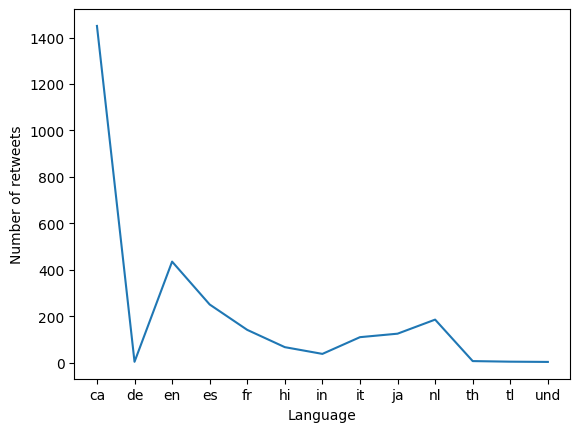

In [32]:
plt.plot(lan_retweets.index, lan_retweets["retweet_count"])
plt.xlabel("Language")
plt.ylabel("Number of retweets")
plt.show()